In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os    
import math
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# <span style="color:blue">  Esercizi 7.3-7.4 - Radial distribution function $g(r)$</span>

In [4]:
r_gofr_MD=gofr=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MD_simulations\gofr.dat", usecols=1)
gofr_MD=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MD_simulations\gofr.dat", usecols=2)
gofr_err_MD=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MD_simulations\gofr.dat", usecols=3)
U_MD=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MD_simulations\potential_energy.dat", usecols=2)
U_err_MD=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MD_simulations\potential_energy.dat", usecols=3)
p_MD=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MD_simulations\pressure.dat", usecols=2)
p_err_MD=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MD_simulations\pressure.dat", usecols=3)

In [7]:
r_gofr_MC=gofr=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MC_simulations\gofr.dat", usecols=1)
gofr_MC=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MC_simulations\gofr.dat", usecols=2)
gofr_err_MC=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MC_simulations\gofr.dat", usecols=3)
U_MC=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MC_simulations\potential_energy.dat", usecols=2)
U_err_MC=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MC_simulations\potential_energy.dat", usecols=3)
p_MC=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MC_simulations\pressure.dat", usecols=2)
p_err_MC=np.loadtxt(r"NSL_SIMULATOR\OUTPUT\MC_simulations\pressure.dat", usecols=3)

Text(0.5, 1.0, 'Funzione di distribuzione radiale, media su 50 blocchi')

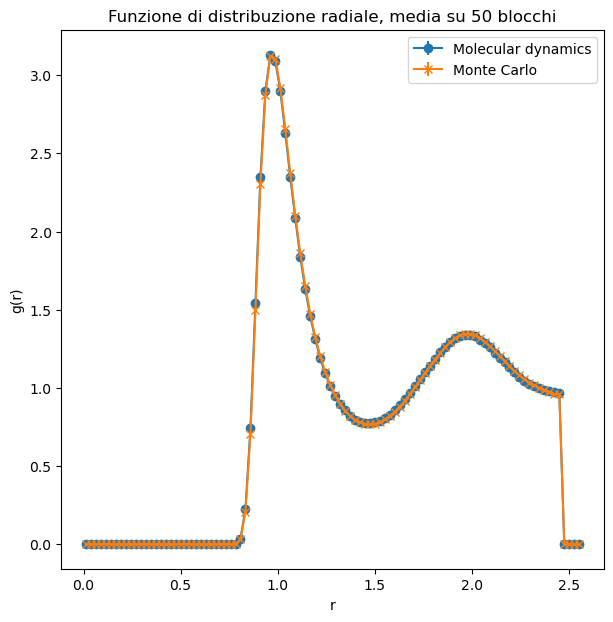

In [9]:
fig, ax= plt.subplots(1,1, figsize=(7,7))
ax.errorbar(r_gofr_MD[-100:], gofr_MD[-100:], yerr=gofr_err_MD[-100:], label="Molecular dynamics", marker="o")
ax.errorbar(r_gofr_MC[-100:], gofr_MC[-100:], yerr=gofr_err_MC[-100:], label="Monte Carlo", marker="x")
ax.legend()
ax.set_xlabel("r")
ax.set_ylabel("g(r)")
ax.set_title("Funzione di distribuzione radiale, media su 50 blocchi")

Text(0.5, 1.0, 'Pressure vs blocks')

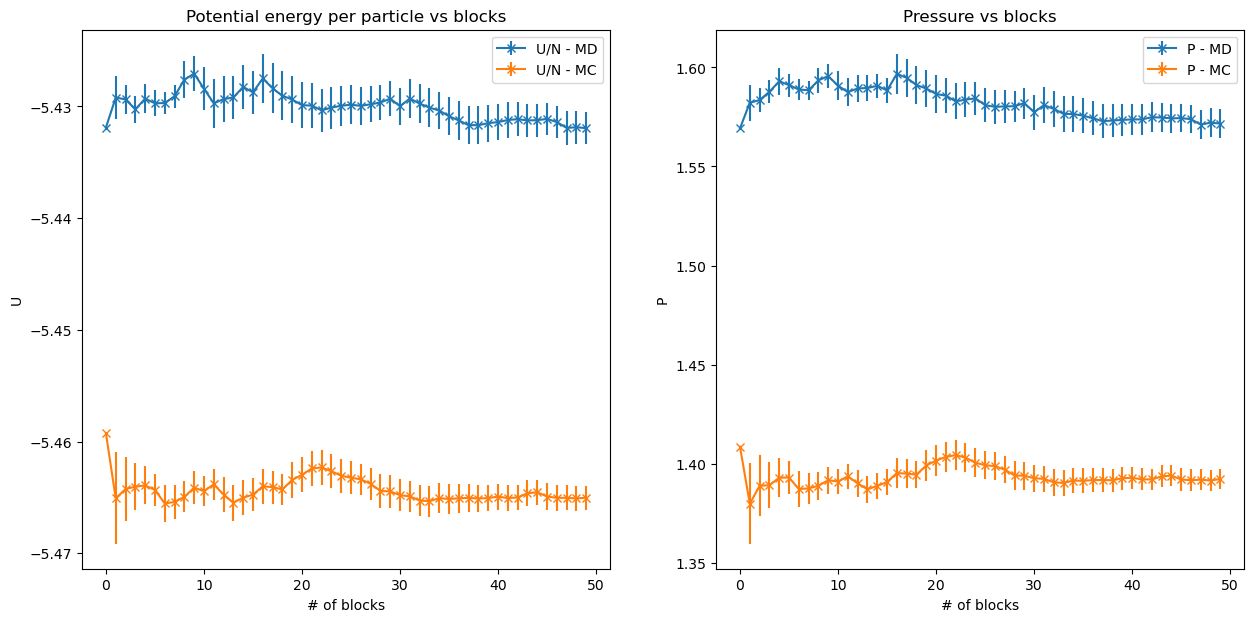

In [28]:
blocks=[*range(0, len(U_MD))]
fig, ax= plt.subplots(1,2, figsize=(15, 7))
ax[0].errorbar(blocks, U_MD, yerr=U_err_MD, marker="x", label="U/N - MD")
ax[1].errorbar(blocks, p_MD, yerr=p_err_MD, marker="x", label="P - MD")
ax[0].errorbar(blocks, U_MC, yerr=U_err_MC, marker="x", label="U/N - MC")
ax[1].errorbar(blocks, p_MC, yerr=p_err_MC, marker="x", label="P - MC")
ax[0].legend()
ax[1].legend()
ax[1].set_xlabel("# of blocks")
ax[0].set_xlabel("# of blocks")
ax[1].set_ylabel("P")
ax[0].set_ylabel("U")
ax[0].set_title("Potential energy per particle vs blocks")
ax[1].set_title("Pressure vs blocks")

Text(0.5, 1.0, 'Pressure vs blocks - MD')

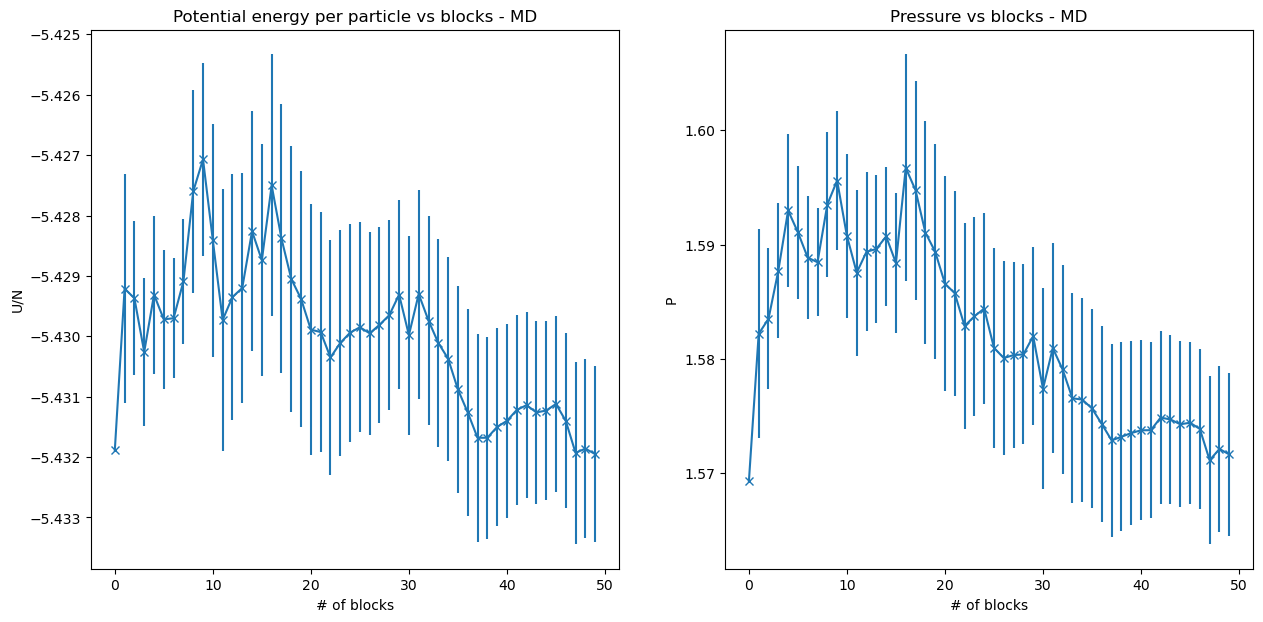

In [30]:
blocks=[*range(0, len(U_MD))]
fig, ax= plt.subplots(1,2, figsize=(15, 7))
ax[0].errorbar(blocks, U_MD, yerr=U_err_MD, marker="x", label="U/N - MD")
ax[1].errorbar(blocks, p_MD, yerr=p_err_MD, marker="x", label="P - MD")
ax[1].set_xlabel("# of blocks")
ax[0].set_xlabel("# of blocks")
ax[1].set_ylabel("P")
ax[0].set_ylabel("U/N")
ax[0].set_title("Potential energy per particle vs blocks - MD")
ax[1].set_title("Pressure vs blocks - MD")

Text(0.5, 1.0, 'Pressure vs blocks - MC')

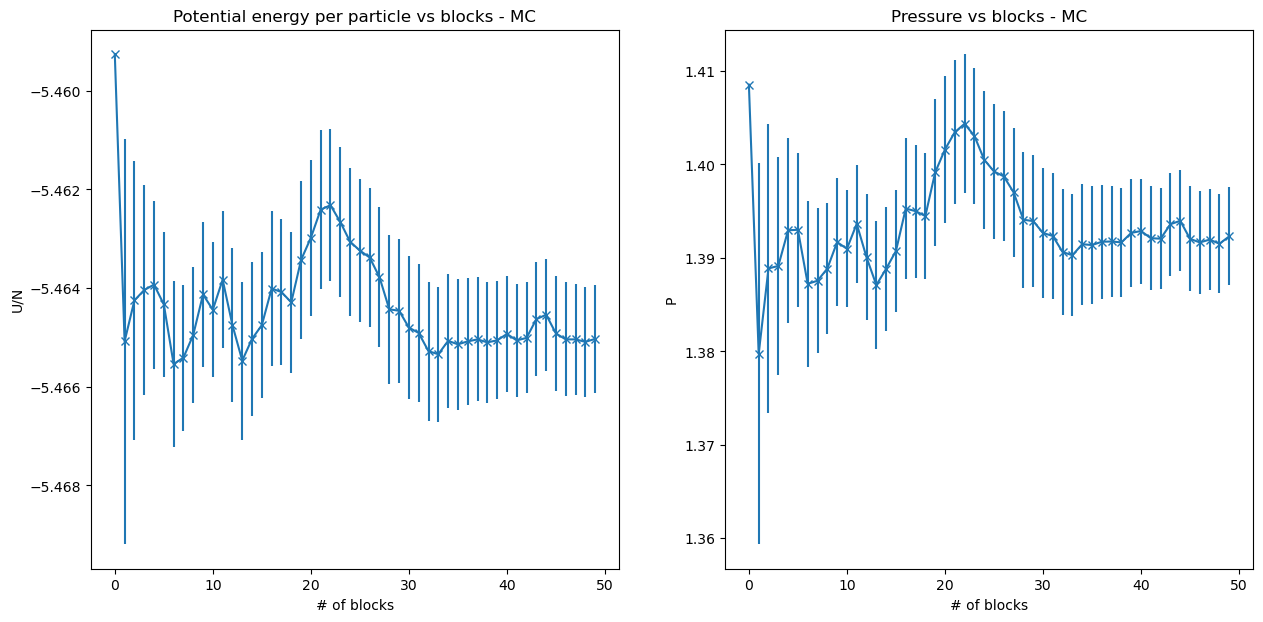

In [33]:
blocks=[*range(0, len(U_MD))]
fig, ax= plt.subplots(1,2, figsize=(15, 7))
ax[0].errorbar(blocks, U_MC, yerr=U_err_MC, marker="x", label="U/N - MC")
ax[1].errorbar(blocks, p_MC, yerr=p_err_MC, marker="x", label="P - MC")
ax[1].set_xlabel("# of blocks")
ax[0].set_xlabel("# of blocks")
ax[1].set_ylabel("P")
ax[0].set_ylabel("U/N")
ax[0].set_title("Potential energy per particle vs blocks - MC")
ax[1].set_title("Pressure vs blocks - MC")

## Commenti

### Scopo dell'esercizio e risultati attesi
- Implementare il calcolo della funzione di distribuzione radiale $g(r)$, cioè la misura di trovare una particella a distanza $r$ da un'altra particella. Il calcolo di r è limitato all'intervallo $[0, L/2]$, con $L$ lato della scatola, questo ci permette di evitare problemi con le condizioni al contorno periodiche, infatti con distanze più grandi potrei dover considerere il fatto che una particella può interagire con sè stessa.
- Eseguire una simulazione dell'Argon con una dinamica MD ($N$, $V$ ed $E$ fissti) e una dinamica MC ($N$, $V$ e $T$ fissati). Confrontare i risultati ottenuti rispetto a energia potenziale per particella $U/N$, pressione $P$, funzione di distribuzione radiale $g(r)$. A parità di condizioni termodinamiche le due simulazioni dovrebbero essere identiche.
### Risultati
- La funzione di distribuzione radiale calcolata con le due simulazioni presenta una sovrapposizione ottima. Si nota che per valori superiori circa a 2.4 la $g(r)$ va a 0, ciò è dovuto al fatto che ho limitato il calcolo della funzione tra $0$ ed $L/2$.
- Per quanto riguarda le energie potenziali per particella e le pressioni, noto che sono distanti tra di loro più di $2\sigma$, questo è probabilmente dovuto al fatto che la temperatura nella simulazione MD non raggiunge esattamente 1.1. La pressione e l'energia potenziale per particella sono quindi decisamente più sensibili a variazioni di temperatura rispetto alla $g(r)$, che invece non sembra risentire di questa discrepanza tra i risultati.